In [71]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from scipy.preprocessing

plt.rcParams['font.size'] = 15
plt.rcParams['figure.figsize'] = (14,4)
plt.rcParams['figure.dpi'] = 200

In [16]:
FILES_DIR = "~/Downloads/mike_200103/"

In [52]:
biasFiles = [f"b20{str(num)}.fits" for num in range(21,31)]
biasPaths = [os.path.expanduser(os.path.join(FILES_DIR, file)) for file in  biasFiles]
biasMatrix = np.array([fits.open(path)[0].data for path in biasPaths])
masterBias = np.nanmedian(biasMatrix, axis=0)

In [44]:
milkyQFiles = [f"b20{str(num)}.fits" for num in range(50,70)]
milkyQPaths = [os.path.expanduser(os.path.join(FILES_DIR, file)) for file in milkyQFiles]
milkyQMatrix = np.array([fits.open(path)[0].data for path in milkyQPaths])
masterFlat = np.nanmedian(milkyQMatrix, axis=0)

In [53]:
b2148 = fits.open(os.path.expanduser(os.path.join(FILES_DIR, "b2148.fits")))[0].data

In [57]:
science = np.divide(b2148 - masterBias, masterFlat - masterBias)

/Users/davidsingleton/opt/miniconda3/envs/joey/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


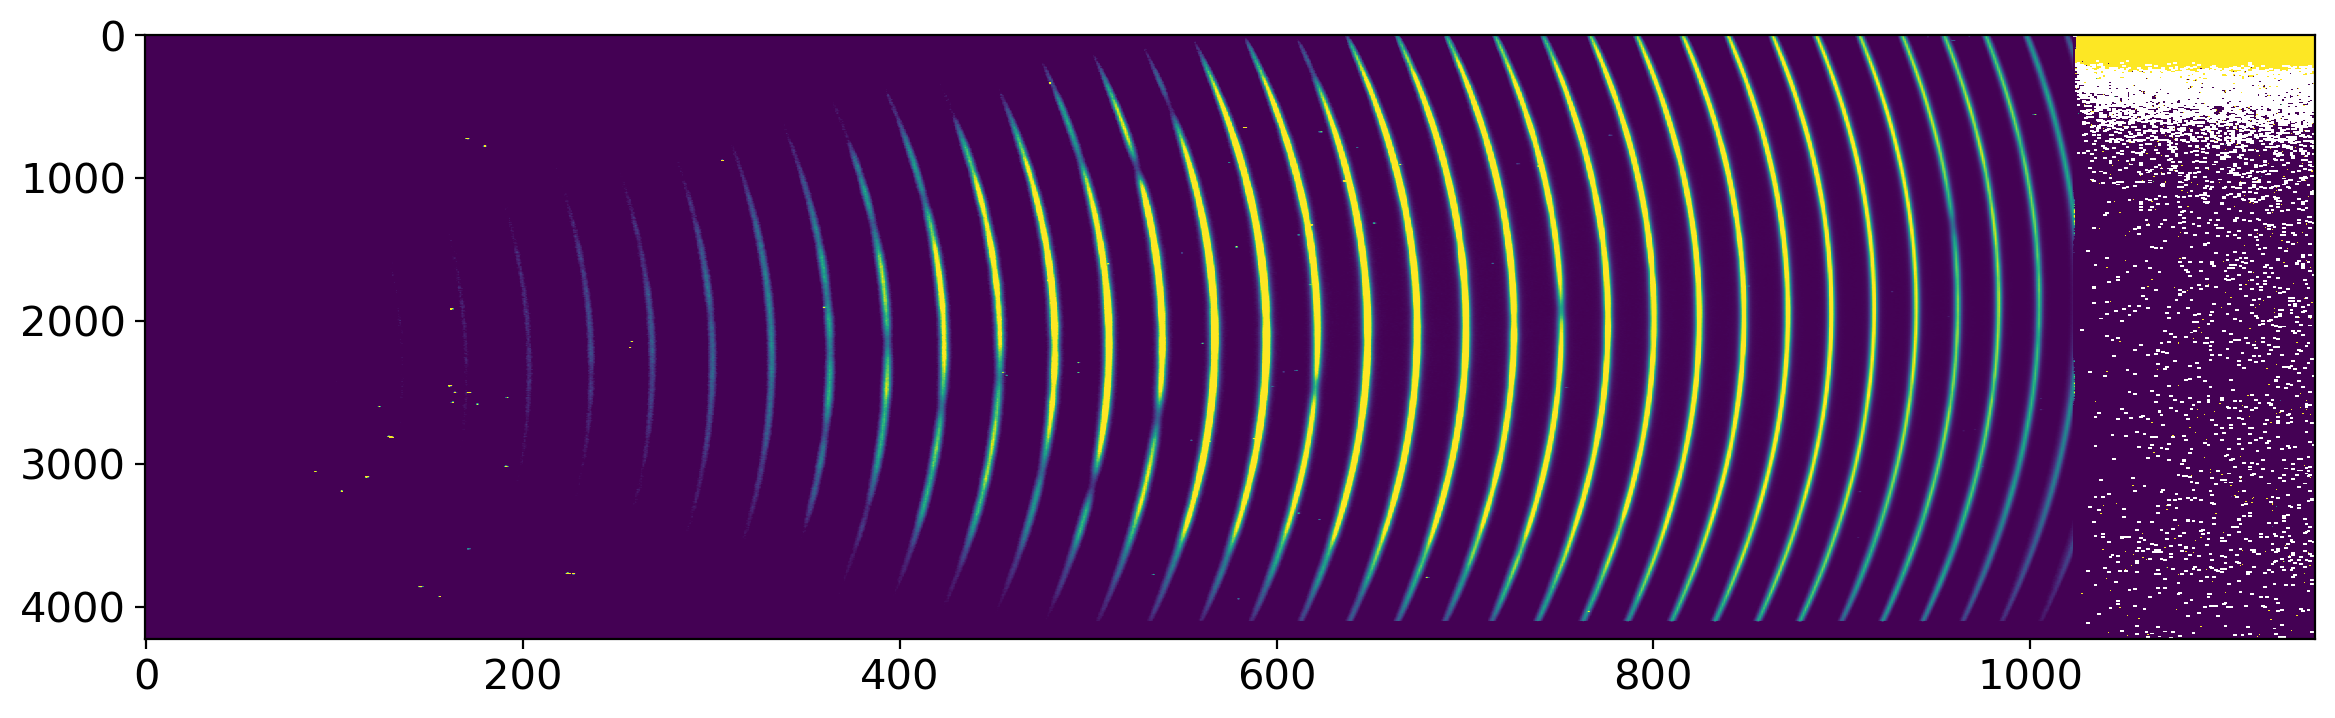

In [105]:
plt.imshow(science, vmin= 0, vmax= 0.1, aspect="auto")

In [185]:
mid = int(science.shape[0]/2)
threshold = 5

lmao = science[mid, :1000]


In [111]:
def approximateOrder(vector, num_orders):
    order_points = [(1000//(num_orders+1))*(i+1) for i in range(num_orders)]
    
     

(1000,)

In [143]:
reduce((lmao > 0.05),
      
      )

array([False, False, False, ..., False, False, False])

In [124]:
num_orders = 3

In [113]:
1000/(2*num_orders)

500.0

In [125]:
[(1000/(num_orders+1))*(i+1) for i in range(num_orders)]

[250.0, 500.0, 750.0]

In [145]:
from functools import reduce

In [148]:
list(map(lambda x: x+1, [1,2,3,4,5]))

[2, 3, 4, 5, 6]

In [150]:
reduce(
    lambda x, y: x+y,
    [1,2,3,4,5],
    0
)

15

In [169]:
def countSpacesBetweenTrues(acc, nextValue):
    if ((acc["prevValue"] == True) & (nextValue == True)):
        return acc
    elif ((acc["prevValue"] == True) & (nextValue == False)):
        return { "spaces": acc["spaces"] + [0], "prevValue": False}
    elif ((acc["prevValue"] == False) & (nextValue == False)):
        return {"spaces": acc["spaces"][:-1] + [acc["spaces"][-1] + 1], "prevValue": False}
    elif ((acc["prevValue"] == False) & (nextValue == True)):
        return {"spaces": acc["spaces"], "prevValue": True}

In [189]:
np.mean(reduce(
    countSpacesBetweenTrues,
    (lmao > 0.05),
    {"spaces":[0], "prevValue":False}
)["spaces"])

36.916666666666664

In [163]:
countSpacesBetweenTrues({"spaces":[0], "prevValue":False}, False)

{'spaces': [0, 0], 'prevValue': False}

In [201]:
np.array_split(science[:,:1000], 50, axis=1)

array([[-0.02949853, -0.03790787, -0.03149225, ..., -0.0238954 ,
        -0.02305606, -0.03237574],
       [-0.11271676, -0.09205549, -0.0839599 , ..., -0.09124538,
        -0.0834341 , -0.0730198 ],
       [-0.09131075, -0.10186514, -0.12517986, ..., -0.09916201,
        -0.11307902, -0.10344828],
       ...,
       [-0.10843373, -0.08746356, -0.13081395, ..., -0.0801105 ,
        -0.13505747, -0.12827988],
       [-0.12536443, -0.07826087, -0.09667674, ..., -0.11676647,
        -0.10465116, -0.12209302],
       [-0.10746269, -0.09821429, -0.1       , ..., -0.11396011,
        -0.10084034, -0.10089021]])

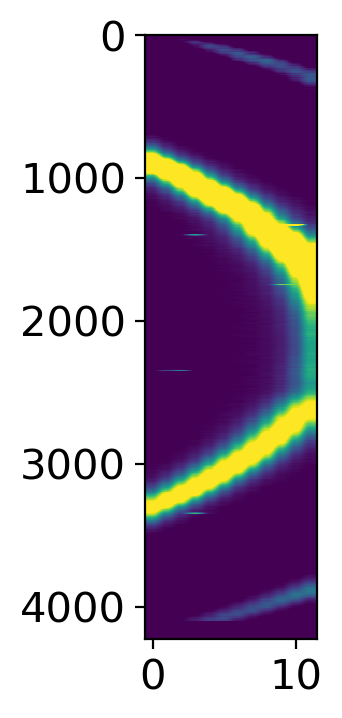

In [216]:
plt.imshow(np.array_split(science[:,405:1000], 50, axis=1)[17], vmin= 0, vmax= 0.1, aspect=.01)